# Jurnal Modul 3

In [692]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

3 line diatas merupakan 3 baris code phyton yang mengimport 3 library, yaitu :
- CV2 merupakan library untuk memproses gambar dan video, yang biasanya digunakan untuk membaca, menulis, dan memanipulasi citra. 
- Numpy merupakan library untuk komputasi numerik dalam phyton, digunakan untuk mengolah data array dan matriks dengan cepat dan efisien. 
- matlotlib.pyplot merupakan library untuk visualisasi data dalam bentuk grafik, seperti plot, histogram, dan diagram

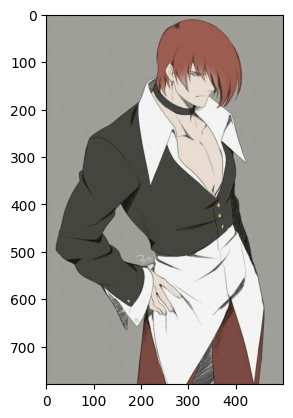

In [693]:
img = plt.imread("IoriYagami.jpg")
plt.imshow(img)

Script di atas digunakan untuk membaca dan menampilkan gambar "IoriYagami.jpg" library matplotlib. `plt.imread("IoriYagami.jpg")` digunakan untuk membaca gambar dari file dan menyimpannya dalam variabel `img` sebagai array NumPy. Selanjutnya, `plt.imshow(img)` digunakan untuk menampilkan gambar yang telah dibaca sebagai representasi visual dari array gambar tersebut.

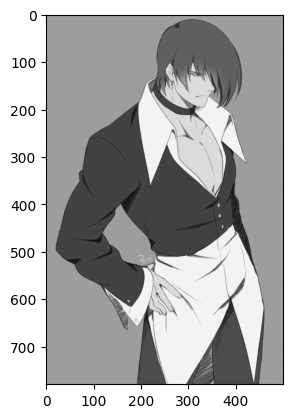

In [694]:
grayImg = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
plt.imshow(grayImg, cmap="gray")

Script di atas digunakan untuk mengubah citra menjadi skala abu-abu ('gray') menggunakan cv2.cvtColor(img, cv2.COLOR_BGR2GRAY) dari library OpenCV. Ini dilakukan dengan mengubah citra berwarna (format BGR) menjadi citra keabuan yang disimpan dalam variabel grayImg.

Selanjutnya, plt.imshow(grayImg, cmap="gray") digunakan untuk menampilkan citra (gambar) keabuan. cmap="gray" digunakan untuk menentukan colormap yang akan digunakan saat menampilkan citra, yaitu colormap skala abu-abu "gray".

 # 1. Dekomposisi Citra

In [695]:
haar_matriks = (1/np.sqrt(2)) * np.array([[1, 1], [1, -1]])

def transWavelet(img, mat):
    # inisialisasi variabel 
    rows, cols = img.shape # mendapatkan dimensi (jumlah baris dan kolom)
    approximation = np.zeros ((rows // 2, cols // 2)) 
    horizontal = np.zeros ((rows // 2, cols // 2)) 
    vertikal = np.zeros ((rows // 2, cols // 2))
    diagonal = np.zeros ((rows // 2, cols // 2))
    # berisi nol dengan dimensi setengah ('//2') dari gambar input 

    # loop transformasi gelombang
    for i in range (0, rows, 2):
        for j in range (0, cols, 2):
            blok = img[i:i+2, j:j+2] # mengambil blok dengan ukuran 2x2, mulai dari posisi saat ini ('i, j')
            result = np.dot(mat, np.dot(blok, mat.T)) # mengaplikasikan matriks ke blok menggunakan perkalian matriks ('np.dot')
            # menyimpan koefisien dari matriks 'result' 
            approximation[i//2, j//2] = result[0, 0] #[0, 0] : sudut kiri atas
            horizontal[i//2, j//2] = result[0, 1] #[0, 1] : sudut kanan atas
            vertikal[i//2, j//2] = result[1, 0] #[1, 0] : sudut kiri bawah
            diagonal[i//2, j//2] = result[1, 1] #[1, 1] : sudut kanan bawah
    return approximation, horizontal, vertikal, diagonal

Script diatas merupakan  fungsi 'transWavelet' yang mengimplementasikan transformasi gelombang 2D sederhana (khususnya menggunakan gelombang Haar) pada gambar input. Fungsi ini membagi gambar menjadi blok 2x2 yang tidak tumpang tindih, menerapkan matriks transformasi gelombang ke setiap blok, dan mengekstrak koefisien aproksimasi serta detail (horizontal, vertikal, diagonal)

In [696]:
# memanggil fungsi 'transWavelet'
approx, d_vertikal, d_horizontal, d_diagonal = transWavelet(grayImg, haar_matriks)

# normalisasi dan memastikan nilai-nilai berada dalam rentang 0 hingga 255
approximation = cv.normalize(approx, None, 0, 255, cv.NORM_MINMAX).astype(np.uint8)
horizontal = cv.normalize(d_horizontal, None, 0, 255, cv.NORM_MINMAX).astype(np.uint8)
vertikal = cv.normalize(d_vertikal, None, 0, 255, cv.NORM_MINMAX).astype(np.uint8)
diagonal = cv.normalize(d_diagonal, None, 0, 255, cv.NORM_MINMAX).astype(np.uint8)

# menyesuaikan ukuran gambar hasil
height = max(approximation.shape[0], horizontal.shape[0] + diagonal.shape[0]) # tinggi gambar
width = max(approximation.shape[1] + vertikal.shape[1], horizontal.shape[1]) # lebar gambar

# inisialisasi 'result'dengan ukuran yang telah ditentukan dan tipe data yang sesuai 
result = np.zeros((height, width), dtype=grayImg.dtype)

# menggabungkan koefisien ke result
result[:approximation.shape[0], :approximation.shape[1]] = approximation
result[approximation.shape[0]:approximation.shape[0]+ horizontal.shape[0], :horizontal.shape[1]] = horizontal
result[:vertikal.shape[0], approximation.shape[1]:approximation.shape[1]+vertikal.shape[1]] = vertikal
result[horizontal.shape[0]:, horizontal.shape[1]:] = diagonal

Script diatas digunakan untuk menggabunngkan koefisien "aproksimasi, detail horizontal, vertikal, dan diagonal" yang akan disimpan di "result"

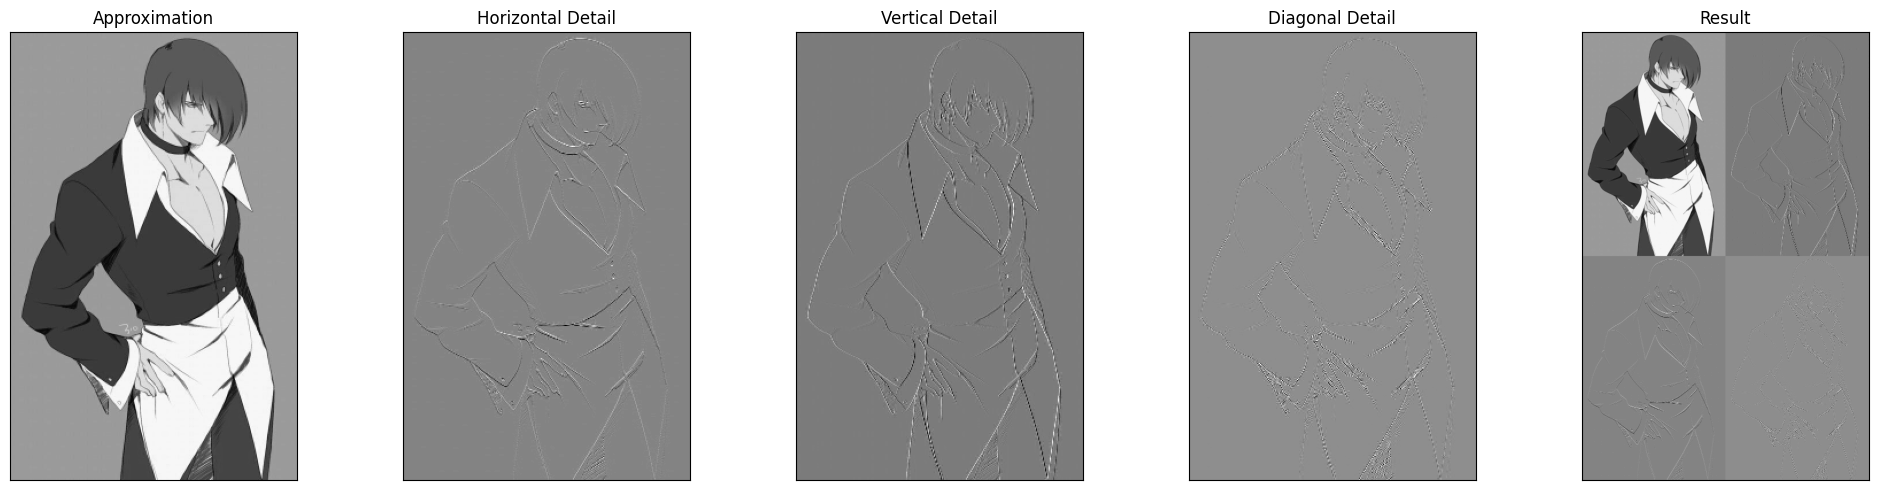

In [697]:
# 1 baris dengan 5 subplot dan dengan lebar 20 inci dan tinggi 5 inci
fig, axes = plt.subplots(1, 5, figsize=(20, 5)) 

# menampilkan citra approximation
axes[0].imshow(approx, cmap="gray")
axes[0].set_title('Approximation')
axes[0].set_xticks([]) # menghilangkan sumbu x
axes[0].set_yticks([]) # menghilangkan sumbu y

# menampilkan citra horizontal detail
axes[1].imshow(d_horizontal, cmap="gray")
axes[1].set_title('Horizontal Detail')
axes[1].set_xticks([])
axes[1].set_yticks([])

# menampilkan citra vertikal detail
axes[2].imshow(d_vertikal, cmap="gray")
axes[2].set_title('Vertical Detail')
axes[2].set_xticks([])
axes[2].set_yticks([])

# menampilkan citra diagonal detail
axes[3].imshow(d_diagonal, cmap="gray")
axes[3].set_title('Diagonal Detail')
axes[3].set_xticks([])
axes[3].set_yticks([])

# menampilkan result
axes[4].imshow (result, cmap="gray")
axes[4].set_title('Result')
axes[4].set_xticks([])
axes[4].set_yticks([])

plt.tight_layout()
plt.show()

Script diatas digunakan untuk membuat dan menampilkan visualisasi dari beberapa citra atau gambar secara bersamaan dengan menggunakan 'matplotlib'.

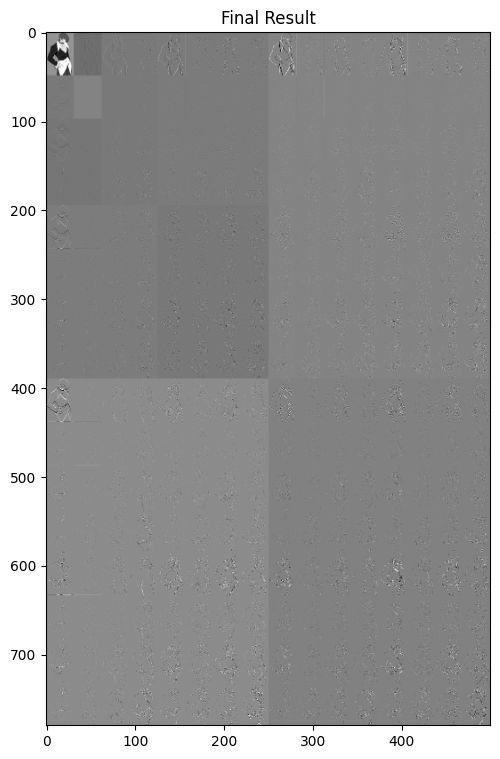

In [698]:
# Fungsi untuk melakukan transformasi wavelet sebanyak 4 kali dan menggabungkan hasilnya
def combine_multiple_times(image, mat, num_iterations):
    for _ in range(num_iterations):
        approx, verti, hori, diago = transWavelet(image, mat)

        # Normalisasi hasil transformasi
        approx_norm = cv.normalize(approx, None, 0, 255, cv.NORM_MINMAX).astype(np.uint8)
        hori_norm = cv.normalize(hori, None, 0, 255, cv.NORM_MINMAX).astype(np.uint8)
        verti_norm = cv.normalize(verti, None, 0, 255, cv.NORM_MINMAX).astype(np.uint8)
        diago_norm = cv.normalize(diago, None, 0, 255, cv.NORM_MINMAX).astype(np.uint8)

        # Gabungkan hasil transformasi
        combined_height = max(approx.shape[0], hori.shape[0] + diago.shape[0])
        combined_width = max(approx.shape[1] + verti.shape[1], hori.shape[1])

        combined_result = np.zeros((combined_height, combined_width), dtype=grayImg.dtype)

        combined_result[:approx.shape[0], :approx.shape[1]] = approx_norm
        combined_result[approx.shape[0]:approx.shape[0]+hori.shape[0], :hori.shape[1]] = hori_norm
        combined_result[:verti.shape[0], approx.shape[1]:approx.shape[1]+verti.shape[1]] = verti_norm
        combined_result[hori.shape[0]:, hori.shape[1]:] = diago_norm

        # Set hasil penggabungan sebagai input untuk iterasi berikutnya
        image = combined_result

    return combined_result

grayImg = cv.imread("IoriYagami.jpg", cv.IMREAD_GRAYSCALE)

# menggabungan sebanyak 4 kali
final_result = combine_multiple_times(grayImg, haar_matriks, 4)

# menampilkan hasil penggabungan terakhir
plt.figure(figsize=(20, 9))
plt.imshow(final_result, cmap="gray")
plt.title("Final Result")
plt.show()

Script diatas berisi fungsi 'combine_multiple_times' yang digunakan untuk melakukan transformasi wavelet sebanyak 'num_iterations' atau 4 terhadap gambar 'image' dengan menggunakan matriks wavelet. Setelah melakukan transformasi pada setiap iterasi, fungsi ini menggabungkan hasil transformasi tersebut untuk membentuk gambar yang lebih komprehensif.

# 2. rekonstruksi dari hasil dekomposisi

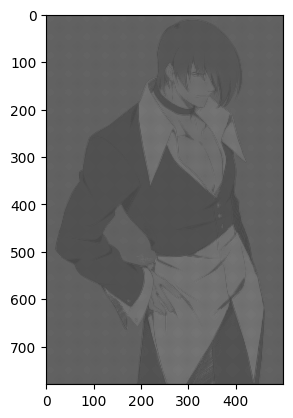

In [699]:
def rekonstruksi(cApprox, cHori, cVerti, cDiago):
     imgHeight, imgWidth = cApprox.shape
     t = imgHeight*2
     l = imgWidth*2
     image = np.zeros([t, l])
     for i in range(0, t, 2):
         for j in range(0, l, 2):
             image[i, j] = cApprox[int(i/2), int(j/2)]
             image[i, j+1] = cHori[int(i/2), int(j/2)]
             image[i+1, j] = cVerti[int(i/2), int(j/2)]
             image[i+1, j+1] = cDiago[int(i/2), int(j/2)]
     return image

hasil = rekonstruksi(approx, d_vertikal, d_horizontal, d_diagonal)
plt.imshow(hasil, cmap='gray')
plt.show()

# 3. Menentukan Level dari Hasil Dekomposisi

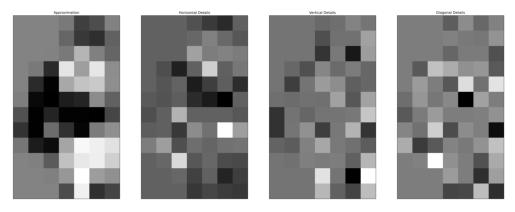

<Figure size 2000x900 with 0 Axes>

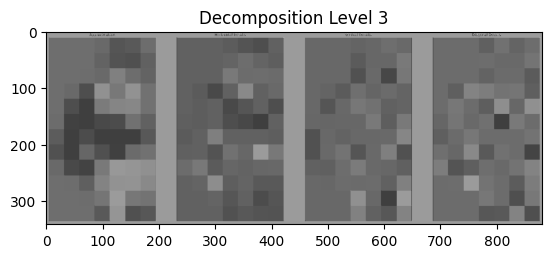

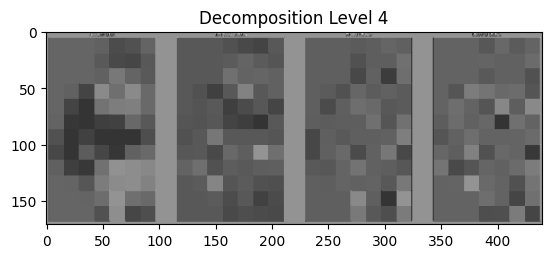

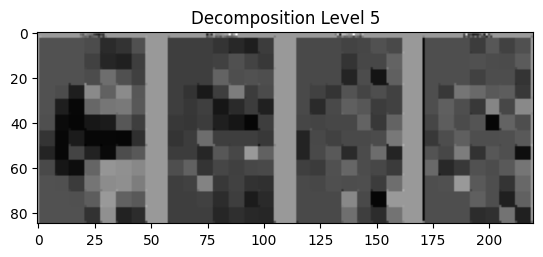

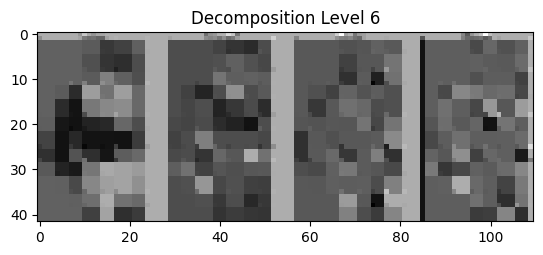

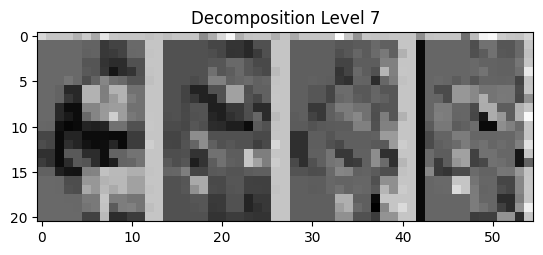

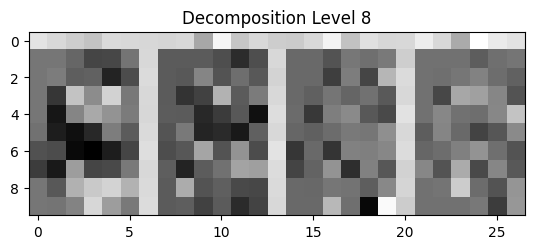

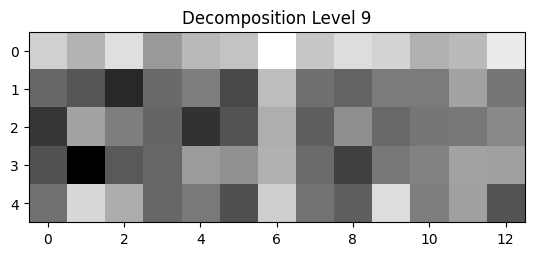

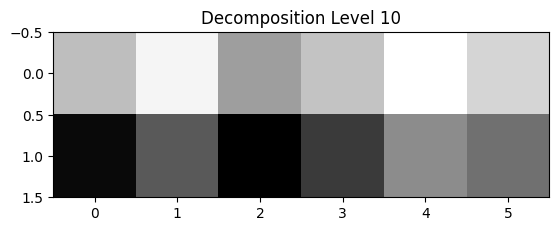

In [700]:
def wavelet_decomposition(image, low_pass_filter, high_pass_filter, level):
    cApprox = image.copy()
    rows, cols = cApprox.shape

    for _ in range(level):
        new_rows = rows // 2
        new_cols = cols // 2
        new_approx = np.zeros((new_rows, new_cols))

        new_approx[:new_rows, :new_cols] = (
            low_pass_filter[0] * cApprox[:-1:2, :-1:2] +
            low_pass_filter[1] * cApprox[:-1:2, 1::2] +
            high_pass_filter[0] * cApprox[1::2, :-1:2] +
            high_pass_filter[1] * cApprox[1::2, 1::2]
        )

        cApprox = new_approx
        rows, cols = cApprox.shape

    return cApprox

def plot_wavelet_decomposition(image, level):
    low_pass_filter = [0.5, 0.5, 0.7, 0.7]
    high_pass_filter = [-0.5, 0.5, -0.7, 0.7]

    cApprox = wavelet_decomposition(image, low_pass_filter, high_pass_filter, level)

    plt.imshow(cApprox, cmap='gray')
    plt.title(f"Decomposition Level {level}")
    plt.show()

image = plt.imread("Assets/___dekomposisi.png")
image_gray = np.mean(image, axis=2)

plt.imshow(image_gray, cmap='gray')
plt.axis("off")
plt.figure(figsize=(20, 9))
plt.show()

levels = [3, 4, 5, 6, 7, 8, 9, 10]  
for level in levels:
    plot_wavelet_decomposition(image_gray, level)

 Dalam dekomposisi wavelet, level menunjukkan berapa kali gambar didekomposisi menjadi subbandnya. Pada setiap level, gambar didekomposisi menjadi empat subband: aproksimasi (frekuensi rendah), detail horizontal (frekuensi tinggi), detail vertikal (frekuensi tinggi), dan detail diagonal (frekuensi tinggi). Berdasarkan hasil dekomposisi terhadap beberapa level diatas yang sesuai sama dengan soal adalah dekomposisi level 4. Jumlah iterasi pada loop for menentukan level dekomposisi.

# 4. Menampilkan representasi sinyal pada hasil dekomposisi pada nomor 3

In [701]:
plt.tight_layout()
plt.show()


<Figure size 640x480 with 0 Axes>